# Feature Scaling/Standarization Practice

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.shape

(400, 5)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.drop(['User ID', 'Gender'], axis = 1, inplace = True)

In [14]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [18]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
import seaborn as sns

<Axes: xlabel='EstimatedSalary', ylabel='Age'>

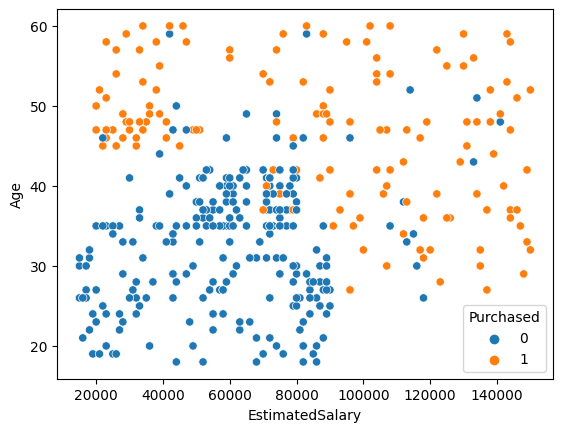

In [19]:
sns.scatterplot(x=df['EstimatedSalary'], y=df['Age'], hue=df['Purchased'])

# Training The Model And Then Applying Standarization/StandardScaler

First We have to split the Data and after that we will apply Standarization
If we apply Standarization on the whole data set before splitting then it has alot of Drawbacks so the best Practice is to Apply Standarization after splitting Data.

In [22]:
from sklearn.model_selection import train_test_split

In [39]:
# X = df['Purchased']
# y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis =1),
                                                    df['Purchased'],
                                                    test_size = 0.2,
                                                    shuffle = True)

In [40]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

# Standard Scaler

In [41]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_train)

In [50]:
X_train_scaled = pd.DataFrame(X_scaled, columns = X_train.columns)
X_train_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [54]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.1
75%,0.8,0.5
max,2.2,2.4
